In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('OpenBCI-RAW-2020-02-18_15-48-31.csv')
df2 = df[df.columns[3]]
df3 = df[df.columns[2]]
df4 = df[df.columns[1]]
df3_len = len(df3)
df3_len

C:\Users\Priya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


39806

In [3]:
df2 = df2.drop(df2.index[0:6])
#df2 = df2.drop(df2.index[30000:39806])
df3 = df3.drop(df3.index[0:4577])
#print(df3)
df3 = df3.drop(df3.index[2000:df3_len-4577])
df4 = df4.drop(df4.index[0:6])
print(df3)

4577   -23856.33
4578   -21384.72
4579   -16422.41
4580   -17394.66
4581   -23137.29
          ...   
6572   -15096.37
6573   -13567.49
6574    -8176.29
6575    -8560.90
6576   -14188.48
Name: Unnamed: 2, Length: 2000, dtype: float64


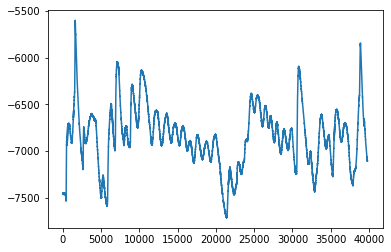

In [4]:
#plt.figure(figsize = (15,15))
plt.plot(df2)

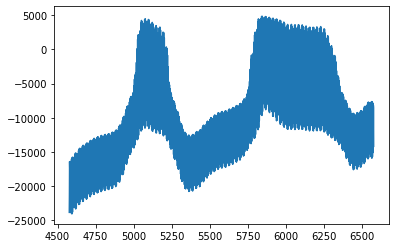

In [5]:
#plt.figure(figsize = (400,400))
plt.plot(df3)

In [6]:
plt.figure(figsize = (400,50))
plt.plot(df4)

In [22]:
import scipy

In [32]:
#arr = scipy.fft(df3[df3.columns[0]])
#fftshift(fft(df3))
arr = df3.to_numpy()
arr_fft = scipy.fft(arr)
arr_fft

array([-20074370.54            +0.j        ,
        -1588004.04423383+3562226.3470487j ,
        -5298918.78611681  +58099.38451894j, ...,
          906881.50807211-2276125.53354989j,
        -5298918.78611681  -58099.38451894j,
        -1588004.04423383-3562226.3470487j ])

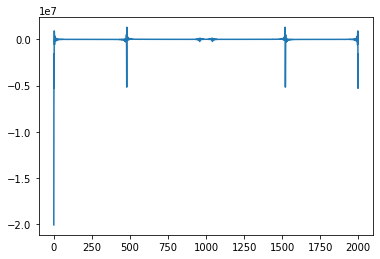

In [33]:
plt.plot(arr_fft)

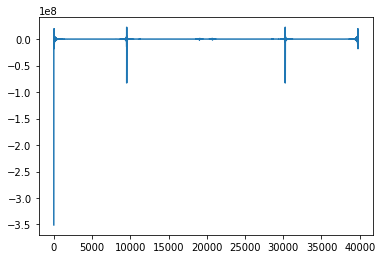

In [34]:
arr4 = df4.to_numpy()
arr_fft4 = scipy.fft(arr4)
plt.plot(arr_fft4)

In [38]:
n = arr4.size
print(n)
print(len(arr4))
freq = np.fft.fftfreq(n, d=0.1)
freq

39800
39800


array([ 0.        ,  0.00025126,  0.00050251, ..., -0.00075377,
       -0.00050251, -0.00025126])

C:\Users\Priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


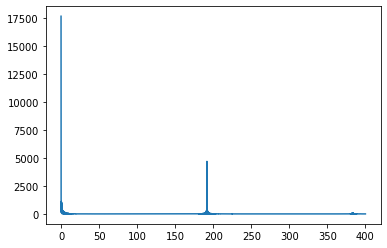

In [40]:
# Number of samplepoints
N = len(arr4)
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = arr4
yf = scipy.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()